In [94]:
# Con el siguiente código...

import torch
torch.manual_seed(seed=42) 
POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

def make_features(x):
    """Construye características, estilo un vector [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

def f(x):
    """Función de aproximación."""
    return x.mm(W_target) + b_target.item()

def poly_desc(W, b):
    """Descripción del polinomio en str."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, i + 1)
    result += '{:+.2f}'.format(b[0])
    return result


def get_batch(batch_size=32):
    """Construye batches en parejas (x, f(x))."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y

In [95]:
# examina W_target
print(W_target)

tensor([[1.6835],
        [0.6440],
        [1.1723],
        [1.1517]])


In [96]:
# Cambia la vista para verlo como un vector
print(W_target.view(-1))

tensor([1.6835, 0.6440, 1.1723, 1.1517])


In [97]:
# examina b_target
print(b_target)

tensor([-5.6143])


In [98]:
# Imprime la descripción del polinomio
print(poly_desc(W_target.view(-1), b_target))

y = +1.68 x^1 +0.64 x^2 +1.17 x^3 +1.15 x^4 -5.61


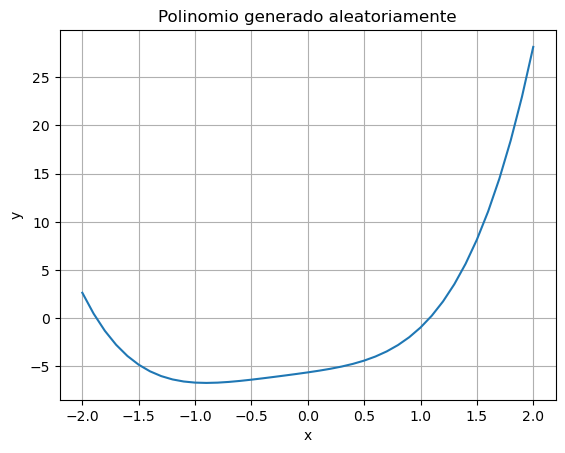

In [99]:
import matplotlib.pyplot as plt

# Crea un conjunto de muestras X en el rango de -2 a 2, con pasos de 0.1
X = torch.arange(-2, 2.1, 0.1)  

# invoca a la función make_features para crear las y
X_poly = make_features(X)
y = f(X_poly)

# dibuja con matplotlib el polinomio con X e y
plt.plot(X.numpy(), y.numpy())
plt.title("Polinomio generado aleatoriamente")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [100]:
# Crea la clase Aproximador de polinomios con capa de entrada de 4 unidades, 
# capa densa de 10 unidades y capa de salida de una unidad (regresión)
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = torch.nn.Linear(4, 10)
        self.output = torch.nn.Linear(10, 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x

In [103]:
# crea los siguientes elementos
# a) una instancia del modelo
# b) un optimizador Adam (torch.optim.Adam())
# c) una función de pérdida torch.nn.MSELoss()
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# pon el modelo en modo entrenamiento
model.train()

# entrena el modelo 200 épocas con 4 batches
for epoch in range(200):
    for _ in range(4):  # 4 batches por época
        x, y = get_batch(batch_size=32)         # generar datos sintéticos
        y_pred = model(x)                       # predicción
        loss = loss_fn(y_pred, y)               # calcular pérdida

        optimizer.zero_grad()                   # limpiar gradientes anteriores
        loss.backward()                         # backpropagation
        optimizer.step()                        # actualizar parámetros

    if epoch % 20 == 0:
        print(f"Época {epoch}: pérdida = {loss.item():.4f}")

Época 0: pérdida = 491.7637
Época 20: pérdida = 2.6209
Época 40: pérdida = 0.0522
Época 60: pérdida = 0.0009
Época 80: pérdida = 0.0001
Época 100: pérdida = 0.0001
Época 120: pérdida = 0.0000
Época 140: pérdida = 0.0000
Época 160: pérdida = 0.0000
Época 180: pérdida = 0.0000


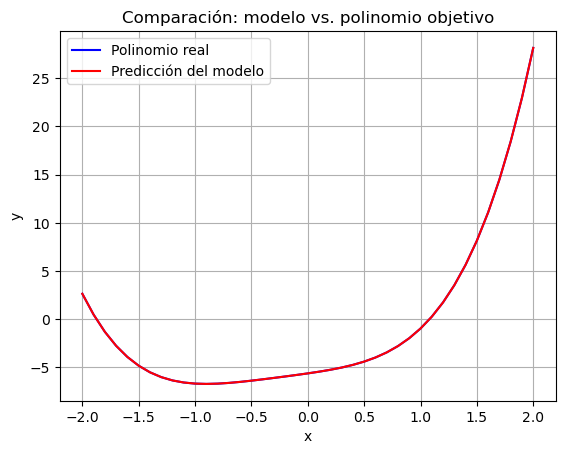

In [ ]:
# Evalúa el modelo 
model.eval()

X = torch.arange(-2, 2.1, 0.1)
X_poly = make_features(X)

with torch.no_grad():
    y_pred = model(X_poly)

y_true = f(X_poly)

# Visualiza con matplotlib las predicciones en rojo y las y verdades en azul 
plt.plot(X.numpy(), y_true.numpy(), label="Polinomio real", color="blue")
plt.plot(X.numpy(), y_pred.numpy(), label="Predicción del modelo", color="red")
plt.title("Comparación: modelo vs. polinomio objetivo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Ahora tu, prueba a crear tu modelo AproximadorPolinomios0 con un esquema más sencillo
#### Entrena, evalua y visualiza las predicciones

Época 0: pérdida = 43.4499
Época 20: pérdida = 182.5158
Época 40: pérdida = 14.4446
Época 60: pérdida = 19.8300
Época 80: pérdida = 28.1538
Época 100: pérdida = 3.9760
Época 120: pérdida = 2.0193
Época 140: pérdida = 1.9212
Época 160: pérdida = 0.5752
Época 180: pérdida = 0.2494


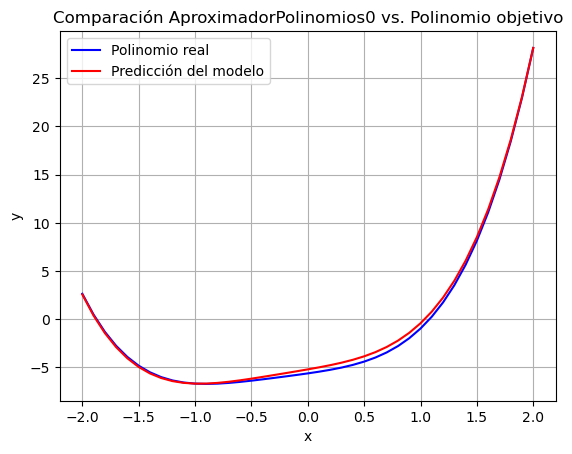

In [105]:
class AproximadorPolinomios0(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.output = torch.nn.Linear(4, 1)  # solo una capa lineal de entrada a salida

    def forward(self, x):
        return self.output(x)

model = AproximadorPolinomios0()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

model.train()

for epoch in range(200):
    for _ in range(4):  # 4 batches por época
        x, y = get_batch(batch_size=32)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 20 == 0:
        print(f"Época {epoch}: pérdida = {loss.item():.4f}")

model.eval()

X = torch.arange(-2, 2.1, 0.1)
X_poly = make_features(X)

with torch.no_grad():
    y_pred = model(X_poly)

y_true = f(X_poly)

plt.plot(X.numpy(), y_true.numpy(), label="Polinomio real", color="blue")
plt.plot(X.numpy(), y_pred.numpy(), label="Predicción del modelo", color="red")
plt.title("Comparación AproximadorPolinomios0 vs. Polinomio objetivo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
